### Imports

In [1]:
import sys
mypath = "/home/basia/Documents/spectroscopy/magnetstein"
sys.path.insert(0, mypath)

In [2]:
import numpy as np
import pandas as pd
import os
from masserstein import NMRSpectrum, estimate_proportions
import matplotlib.pyplot as plt
import pulp
import pickle

### Data

In [3]:
experiment_name = 'PMG 284 monitoring with full mixture spectrum'

In [4]:
if experiment_name == 'PMG 284 monitoring':
    whole_mixture_or_regions = 'regions'
elif experiment_name == 'PMG 284 monitoring with full mixture spectrum':
    whole_mixture_or_regions = 'whole'

if whole_mixture_or_regions == 'regions':
    data_path = '../../data/PMG_284/'
    mixture_path = data_path + '284_edited_corrected.csv'

elif whole_mixture_or_regions == 'whole':
    data_path = '../../data/PMG_284_full_mixture_spectrum/'
    mixture_path = data_path + '284_edited_corrected_no_cut.csv'

mixture_separator = '\t'

#### Mixture in time

In [5]:
mixture_time_data = pd.read_csv(mixture_path, sep = mixture_separator).iloc[:,:-2]

In [6]:
mixture_time_data

,Unnamed: 0,seria1\nSTANDARD_PROTON_PARAMETERS\n_1,seria1\nSTANDARD_PROTON_PARAMETERS\n_2,seria1\nSTANDARD_PROTON_PARAMETERS\n_3,seria1\nSTANDARD_PROTON_PARAMETERS\n_4,seria1\nSTANDARD_PROTON_PARAMETERS\n_5,seria1\nSTANDARD_PROTON_PARAMETERS\n_6,seria1\nSTANDARD_PROTON_PARAMETERS\n_7,seria1\nSTANDARD_PROTON_PARAMETERS\n_8,seria1\nSTANDARD_PROTON_PARAMETERS\n_9,...,seria1\nSTANDARD_PROTON_PARAMETERS\n_990,seria1\nSTANDARD_PROTON_PARAMETERS\n_991,seria1\nSTANDARD_PROTON_PARAMETERS\n_992,seria1\nSTANDARD_PROTON_PARAMETERS\n_993,seria1\nSTANDARD_PROTON_PARAMETERS\n_994,seria1\nSTANDARD_PROTON_PARAMETERS\n_995,seria1\nSTANDARD_PROTON_PARAMETERS\n_996,seria1\nSTANDARD_PROTON_PARAMETERS\n_997,seria1\nSTANDARD_PROTON_PARAMETERS\n_998,seria1\nSTANDARD_PROTON_PARAMETERS\n_999
0,0.296531,-0.001496,-0.001895,-0.001444,-0.001412,-0.001480,-0.000686,-0.000318,-0.002254,-0.000767,...,-0.003190,-0.003500,-0.004189,-0.003312,-0.003064,-0.003149,-0.003975,-0.002728,-0.003524,-0.003118
1,0.296652,-0.001362,-0.001771,-0.001527,-0.001360,-0.001541,-0.000669,-0.000409,-0.002313,-0.000815,...,-0.003488,-0.003596,-0.004148,-0.003396,-0.002765,-0.003071,-0.003959,-0.002526,-0.003595,-0.003306
2,0.296774,-0.001438,-0.001647,-0.001459,-0.001308,-0.001603,-0.000651,-0.000500,-0.002371,-0.000871,...,-0.003419,-0.003457,-0.004083,-0.003453,-0.002466,-0.003275,-0.003772,-0.002465,-0.003580,-0.003209
3,0.296896,-0.001613,-0.001709,-0.001392,-0.001389,-0.001422,-0.000765,-0.000500,-0.002147,-0.000728,...,-0.003180,-0.003319,-0.004018,-0.003511,-0.002456,-0.003610,-0.003720,-0.002404,-0.003566,-0.002993
4,0.297017,-0.001789,-0.001772,-0.001483,-0.001470,-0.001241,-0.000878,-0.000500,-0.001924,-0.000661,...,-0.003186,-0.003434,-0.003904,-0.003306,-0.002446,-0.003775,-0.003839,-0.002444,-0.003573,-0.002777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62935,7.951920,0.000516,0.000909,0.001160,0.001443,0.001737,0.001551,0.001839,0.002215,0.001932,...,0.001650,0.001637,0.001896,0.002094,0.001653,0.001790,0.001994,0.002161,0.001816,0.002063
62936,7.952040,0.000504,0.000915,0.001037,0.001431,0.001760,0.001557,0.001810,0.002248,0.001847,...,0.001795,0.001554,0.001897,0.002067,0.001828,0.001957,0.001840,0.001907,0.001802,0.001893
62937,7.952160,0.000473,0.000856,0.000914,0.001590,0.001632,0.001563,0.001781,0.002237,0.001961,...,0.001940,0.001471,0.001898,0.002042,0.001824,0.001982,0.001849,0.001823,0.001789,0.001723
62938,7.952280,0.000443,0.000797,0.001168,0.001749,0.001505,0.001569,0.001752,0.002225,0.002063,...,0.002043,0.001444,0.002004,0.002157,0.001820,0.002008,0.002028,0.001908,0.001775,0.001555


In [7]:
names = ['ppm'] + ['t' + str(nb) for nb in range(1, mixture_time_data.shape[1])]

In [8]:
mixture_time_data.columns = names

In [9]:
def load_spectrum(mixture_time_data, moment_of_time):
    ppm = mixture_time_data['ppm']
    intensity = mixture_time_data['t'+str(moment_of_time)]
    sp = NMRSpectrum(confs = list(zip(ppm, intensity)))
    return sp

In [10]:
#%matplotlib notebook

/home/basia/Documents/spectroscopy/magnetstein/masserstein/spectrum.py:757: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc=0, ncol=1)


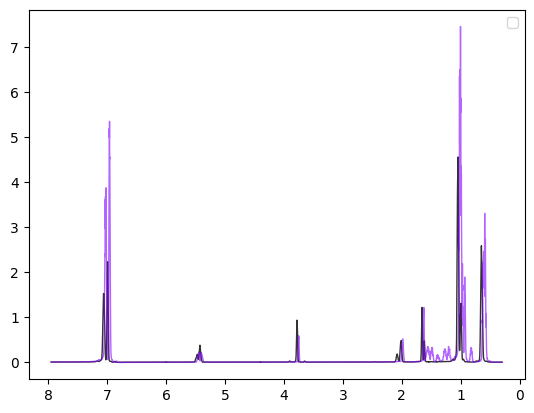

In [11]:
plt.gca().invert_xaxis()
NMRSpectrum.plot_all([load_spectrum(mixture_time_data, 1),
                     load_spectrum(mixture_time_data, 999)], profile=True)

#### Reagents

In [12]:
reagents_sp = []

mix920 = pd.DataFrame(load_spectrum(mixture_time_data, 920).confs)

#2-pentene
reagent0 = mix920[mix920[0].apply(lambda x: (x>5.3 and x<5.6)
                                 )]
ppm = reagent0.iloc[:,0]
ints = reagent0.iloc[:,1]
reagents_sp.append(NMRSpectrum(confs = list(zip(ppm, ints))))


#triethylsilane                           
reagent1 = mix920[mix920[0].apply(lambda x: (x>3.6 and x<3.95)
                                 )]
ppm = reagent1.iloc[:,0]
ints = reagent1.iloc[:,1]
reagents_sp.append(NMRSpectrum(confs = list(zip(ppm, ints))))

#product                              
reagent2 = mix920[mix920[0].apply(lambda x: (x>1.16 and x<1.36) 
                                 )]
ppm = reagent2.iloc[:,0]
ints = reagent2.iloc[:,1]
reagents_sp.append(NMRSpectrum(confs = list(zip(ppm, ints))))

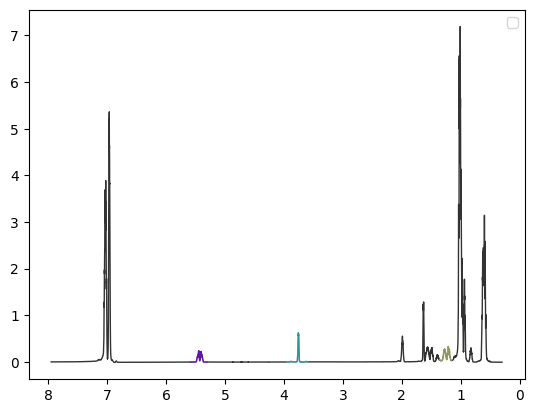

In [13]:
mix920_sp = load_spectrum(mixture_time_data, 920)
plt.gca().invert_xaxis()
#plt.xlim(1.8, 1.14)
NMRSpectrum.plot_all([mix920_sp] + reagents_sp, profile=True)

### Mixture

In [14]:
if whole_mixture_or_regions == 'whole':
    pass
elif whole_mixture_or_regions == 'regions':
    mixture_time_data = mixture_time_data[mixture_time_data['ppm'].apply(lambda x: 
                                                        (x>5.3 and x<5.6) or 
                                                        (x>3.6 and x<3.95) or 
                                                        (x>1.16 and x<1.36) 
                                     )]

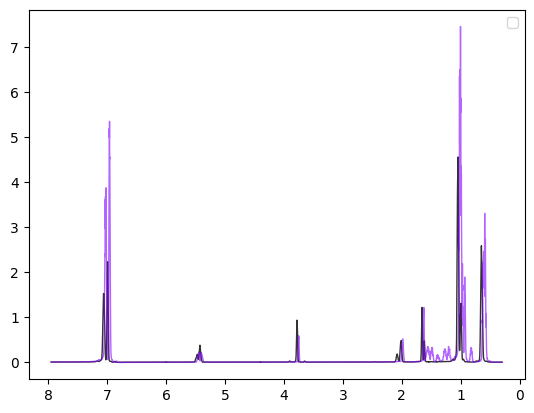

In [15]:
plt.gca().invert_xaxis()
NMRSpectrum.plot_all([load_spectrum(mixture_time_data, 1),
                 load_spectrum(mixture_time_data, 999)], profile=True)

### Saving preprocessed spectra

In [16]:
np.savetxt(data_path + 'preprocessed_pentene.csv', reagent0, delimiter = '\t')
np.savetxt(data_path + 'preprocessed_triethylsilane.csv', reagent1, delimiter = '\t')
np.savetxt(data_path + 'preprocessed_product.csv', reagent2, delimiter = '\t')

if whole_mixture_or_regions == 'whole':
    np.savetxt(data_path + 'preprocessed_mixture_whole.csv', mixture_time_data, delimiter = '\t')
    
elif whole_mixture_or_regions == 'regions':
    np.savetxt(data_path + 'preprocessed_mixture_cut_to_regions.csv', mixture_time_data, delimiter = '\t')